In [1]:
%matplotlib inline
import numpy as np
from matplotlib import pyplot as plt
'''
2N in the Input Layer
2N in the Hidden Layer
1N in the Output Layer
'''

'\n3N in the Input Layer\n4N in the Hidden Layer\n1N in the Output Layer\n'

In [14]:


def sigmoid(x):
    return 1 / (1+np.exp(-x))

def sigmoid_p(x):
    return sigmoid(x) * (1-sigmoid(x))

def loss(a, y):
    return -1 * ((y * np.log(a)) + (1-y) * np.log(1-a))
#     if y == 1:
#         return -np.log(a)
#     else:
#         return -np.log(1-a)

def loss_d(a, y):
    return (-1 * y / a) + (1-y)/(1-a)
#     if y == 1:
#         return -1/a
#     else:
#         return 1/(1-a)

InputData = np.array([[0, 0],
               [0, 1],
               [1, 0],
               [1, 1]])

TargetData = np.array([[0], [1], [1], [0]])

TestData = np.array([[1, 1, 0],
                     [0, 1, 1]])

w1 = np.zeros((2, 2))
b1 = np.random.randn(2, 1)
b1 = np.repeat(b1, 4, axis=1).T
print(b1)

w2 = np.zeros((1, 2))
b2 = np.random.randn(1, 1)
b2 = np.repeat(b2, 4).reshape(4, 1)
print(b2)
iterations = 500
lr = 0.1
costlist = []



[[-1.32383905  1.21772623]
 [-1.32383905  1.21772623]
 [-1.32383905  1.21772623]
 [-1.32383905  1.21772623]]
[[1.53184898]
 [1.53184898]
 [1.53184898]
 [1.53184898]]


In [15]:
for i in range(iterations):
    

    z1 = np.dot(InputData, w1.T) + b1
    a1 = sigmoid(z1)
    
    z2 = np.dot(a1, w2.T) + b2
    a2 = sigmoid(z2)

    cost = loss(a2, TargetData)
    if i % 100 == 0:
        costlist.append(np.sum(cost))

    #backprop
    #dcda2, da2dz2
    delta = a2 - TargetData # 6, 1
    dz2dw2 = a1 # 6, 4
    dz2da1 = w2 # 1, 4
    da1dz1 = sigmoid_p(z1) #6, 4
    dz1dw1 = InputData # 6, 3
    
    w2 = w2 - lr * np.dot(delta.T, dz2dw2)
    b2 = b2 - lr * delta
    
    w1 = w1 - lr * np.dot((np.dot(delta, w2) * da1dz1).T, dz1dw1)
    b1 = b1 - lr * (np.dot(delta, w2) * da1dz1)


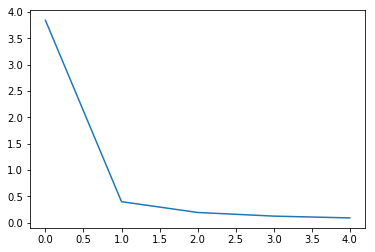

In [16]:
plt.plot(costlist)

In [17]:
z1 = np.dot(InputData, w1.T) + b1
a1 = sigmoid(z1)

z2 = np.dot(a1, w2.T) + b2
a2 = sigmoid(z2)

cost = loss(a2, TargetData)
print("Prediction: \n", a2, "\n")
print("cost: \n", cost, "\n")



Prediction: 
 [[0.01557315]
 [0.98046197]
 [0.98046197]
 [0.01677369]] 

cost: 
 [[0.01569568]
 [0.01973142]
 [0.01973142]
 [0.01691596]] 

